# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

C:\Users\Matheus\AppData\Local\Temp\ipykernel_7788\3617974377.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [14]:
base_df = pd.read_csv('base_sckitlearn.csv', sep= ',')
base_df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


In [10]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  bool   
 9   sexo_M                                  16650 non-null  bool   
 10  posse_de_veiculo_Y                      16650 non-null  bo

In [7]:
base_df.isna().sum()

qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_M                                    0
posse_de_veiculo_Y                        0
posse_de_imovel_Y                         0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated                    0
estado_civil_Single / not marrie

In [8]:
base_df.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                       bool
posse_de_veiculo_Y                           bool
posse_de_imovel_Y                            bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool


In [11]:
y = base_df["mau"]

In [12]:
X = base_df.drop("mau", axis=1)

In [16]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [17]:
clf = DecisionTreeClassifier(random_state=100)

In [18]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [19]:
y.value_counts()

mau
False    16260
True       390
Name: count, dtype: int64

In [21]:
feature_name = X.columns.tolist()

[Text(0.6247442248018321, 0.9814814814814815, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = False'),
 Text(0.3727426146881527, 0.9444444444444444, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = False'),
 Text(0.49874341974499237, 0.962962962962963, 'True  '),
 Text(0.232954376898614, 0.9074074074074074, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = False'),
 Text(0.05999620277197646, 0.8703703703703703, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = False'),
 Text(0.04404784507309664, 0.8333333333333334, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = False'),
 Text(0.03037782418834251, 0.7962962962962963, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = False'),
 Text(0.012151129675337003, 0.7592592592592593, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 28

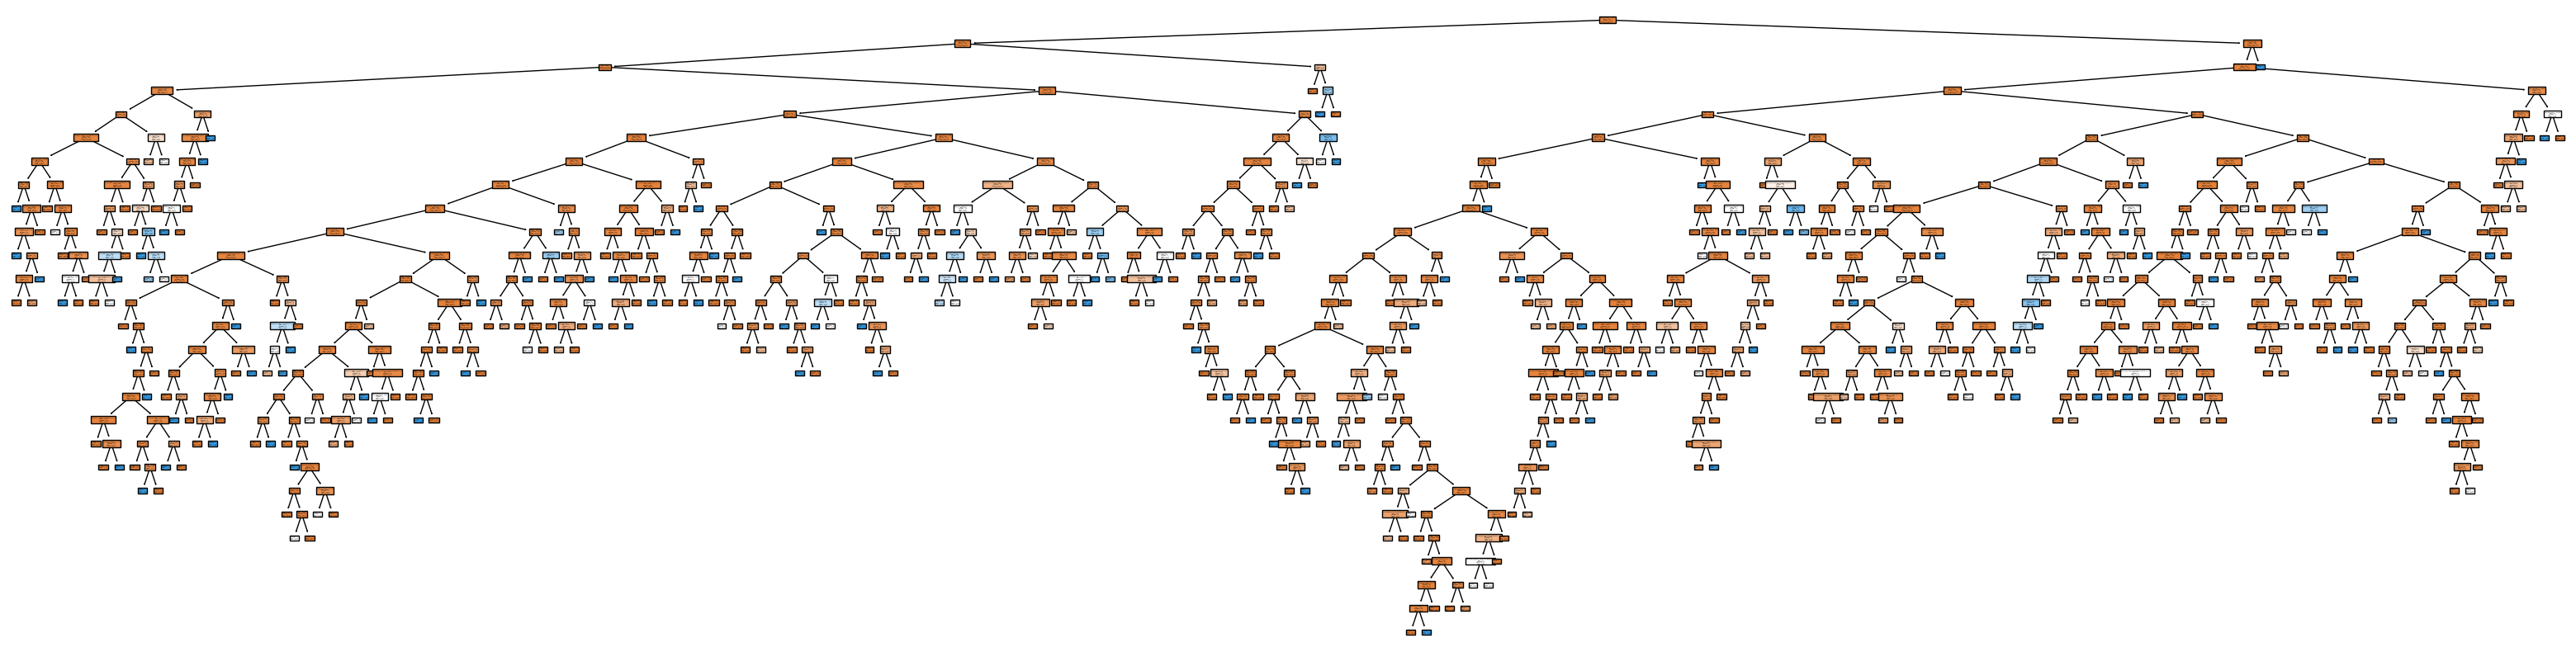

In [24]:
plt.figure(figsize=(40, 10))
plot_tree(clf, filled=True, class_names=["False", "True"], feature_names=feature_name)

In [ ]:
#Como minha arvore ficou extremamente grande isso pode ter gerado overfitting, no caso vou precisar podar limitando a profundidade, o minimo de amostras por folha e limitar o número de amostras para divisão na minha base de treinamento.

clf = DecisionTreeClassifier(random_state=100, max_depth=3, min_samples_leaf=5, min_samples_split=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       random_state=100)

[Text(0.4583333333333333, 0.875, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = False'),
 Text(0.25, 0.625, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = False'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = False'),
 Text(0.08333333333333333, 0.125, 'gini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = False'),
 Text(0.25, 0.125, 'gini = 0.051\nsamples = 3835\nvalue = [3734, 101]\nclass = False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = False'),
 Text(0.6666666666666666, 0.625, 'educacao_Lower secondary <= 0.5\ngini = 0.035\nsamples = 7376\nvalue = [7243, 133]\nclass = False'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'posse_de_imovel_Y <= 0.5\ngini = 0.035\nsamples = 7330\nvalue = [7201, 129]\nclass = False'),
 Text(0.4166666666666667, 0.125, '

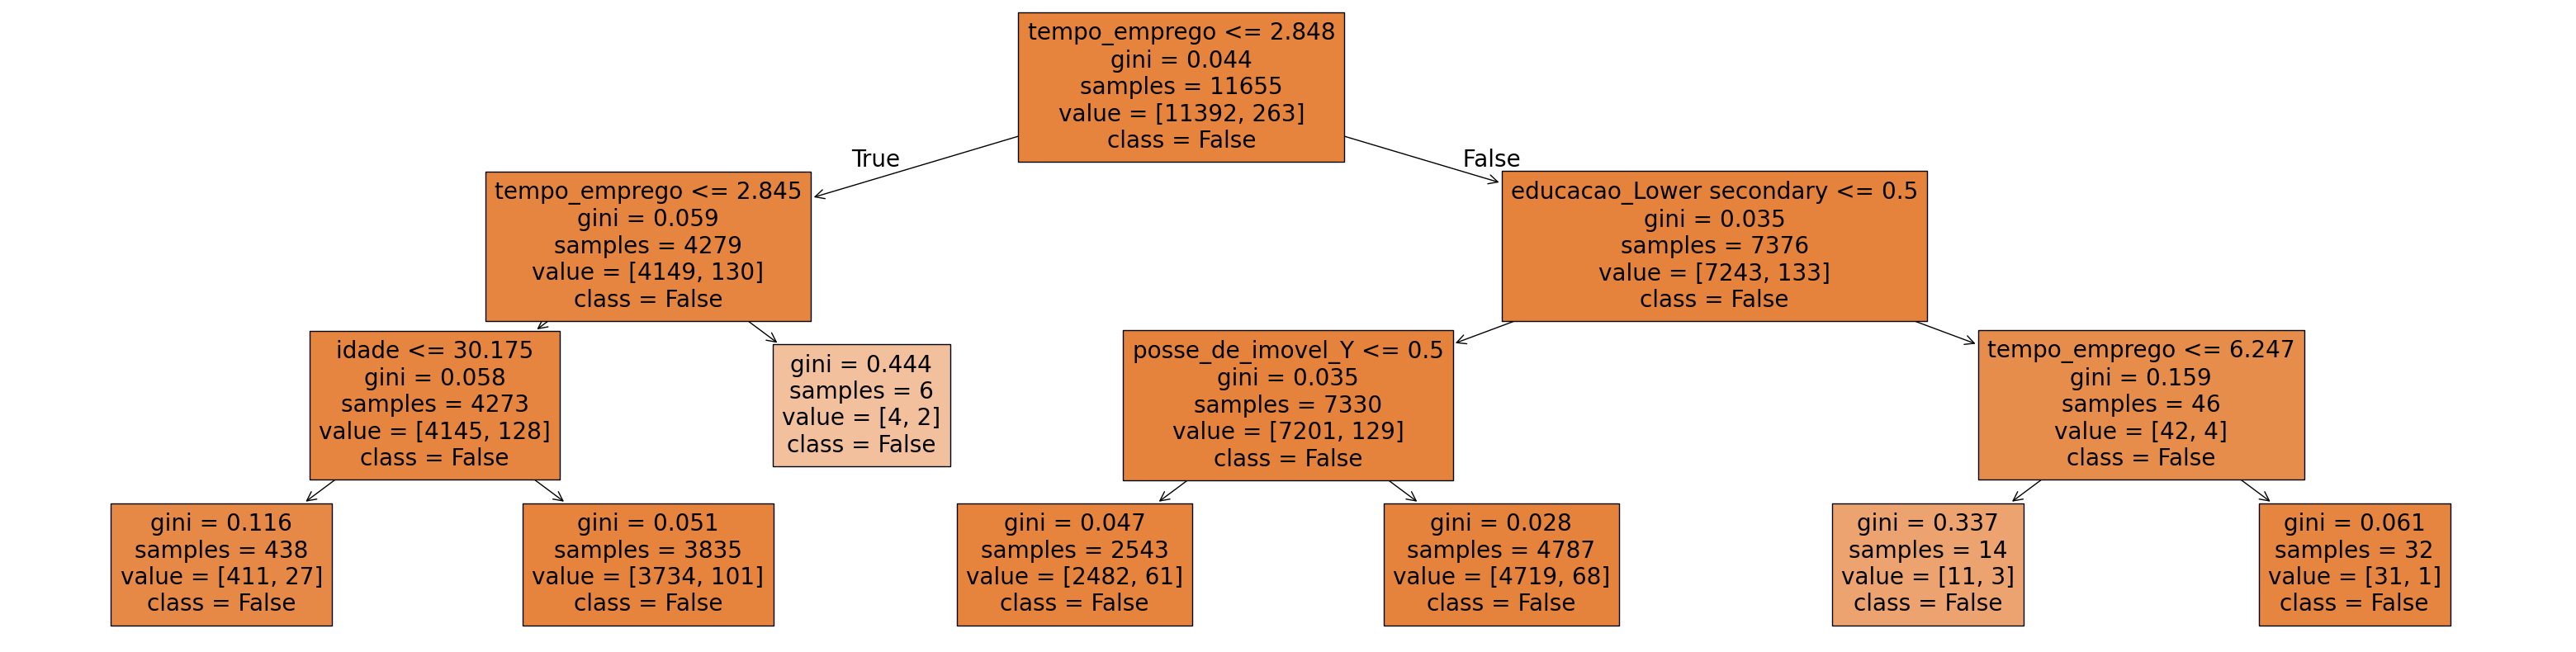

In [31]:
plt.figure(figsize=(40, 10))
plot_tree(clf, filled=True, class_names=["False", "True"], feature_names=feature_name)

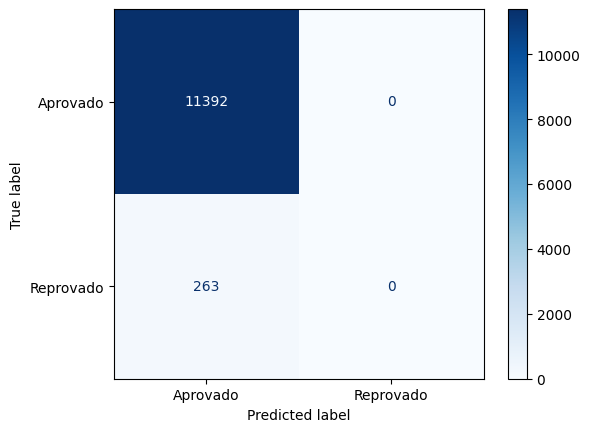

In [32]:
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Aprovado", "Reprovado"])
disp.plot(cmap="Blues")
plt.show()

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [37]:
y_pred_test = clf.predict(X_test)

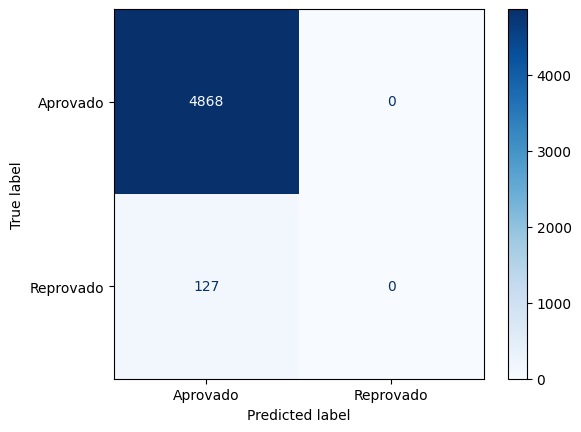

In [38]:
cm_test = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Aprovado", "Reprovado"])
disp.plot(cmap="Blues")
plt.show()

In [39]:
accuracy_score(y_test, y_pred_test)

0.9745745745745745

In [40]:

clf = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf=5, min_samples_split=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=123)

In [42]:
y_pred_test = clf.predict(X_test)

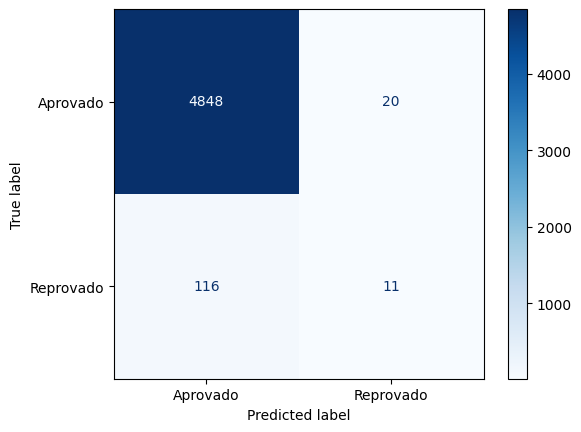

In [43]:
cm_test = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Aprovado", "Reprovado"])
disp.plot(cmap="Blues")
plt.show()

In [ ]:
# Para Calcular a proporção de maus pegaremos o valor de verdadeiros positivos com e os falsos negativos, ou seja 116 + 11 = 127 e dividir pela quantidade total

(127/(4848+116+11+20))*100

#Ou seja 2.54% dos proponentes foram classificados como maus.

2.5425425425425425

In [ ]:
y_train_approved = y_train.apply(lambda x: False)

y_test_approved = y_test.apply(lambda x: False)

clf_approved = DecisionTreeClassifier(random_state=123, max_depth=20, min_samples_leaf=5, min_samples_split=10)
clf_approved.fit(X_train, y_train_approved)

y_pred_approved = clf_approved.predict(X_test)

accuracy_approved = accuracy_score(y_test_approved, y_pred_approved)

print(f'Acurácia classificando tudo como "Aprovado": {accuracy_approved:.4f}')

#Estamos lidando e treinando uma arvore para todas as instâncias com um valor então ele acaba classificando todas as instâncias da mesma forma, ou seja, é um exemplo de uma arvore extremamente enviesada, sendo o pior modelo possível.

Acurácia classificando tudo como "Aprovado": 1.0000
